<a href="https://colab.research.google.com/github/luadeprataart/Reconhecimento-de-Padroes/blob/main/03_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 02 - Análise Exploratória de Dados

---


In [ ]:
import numpy as np
import pandas as pd

df_dataset = pd.read_csv('iris.csv', sep=',', index_col=None)

---

Retomando a aula anterior, esse material aborda como fazer a exploração dos dados e conhecer características que podem distinguir uma classe de outra.

In [ ]:
df_dataset.shape

(150, 5)

In [ ]:
df_dataset.head(n=5)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


---

A função describe() de um DataFrame auxilia a entender algumas medidas estatísticas que descrevem os dados. Serve para entender se uma distribuição é muito diferente de outra e se existe ou não a presença de pontos incomuns.

In [ ]:
df_dataset.describe()

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
classe = df_dataset["classe"]
classe.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: classe, dtype: object

In [ ]:
df_amostrasSetosa = df_dataset[ df_dataset["classe"] == "Iris-setosa"]
df_amostrasSetosa.shape

(50, 5)

---

Em um determinado momento, pode ser interessante a análise para verificar se uma classe específica difere muito da descrição do conjunto de dados como um todo.

In [ ]:
display(df_dataset.describe())
display(df_amostrasSetosa.describe())

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [ ]:
# encontra as classes do conjunto
from collections import Counter

print('Classes e quantidade:', Counter(df_dataset['classe']))

Classes e quantidade: Counter({'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50})


<Axes: >

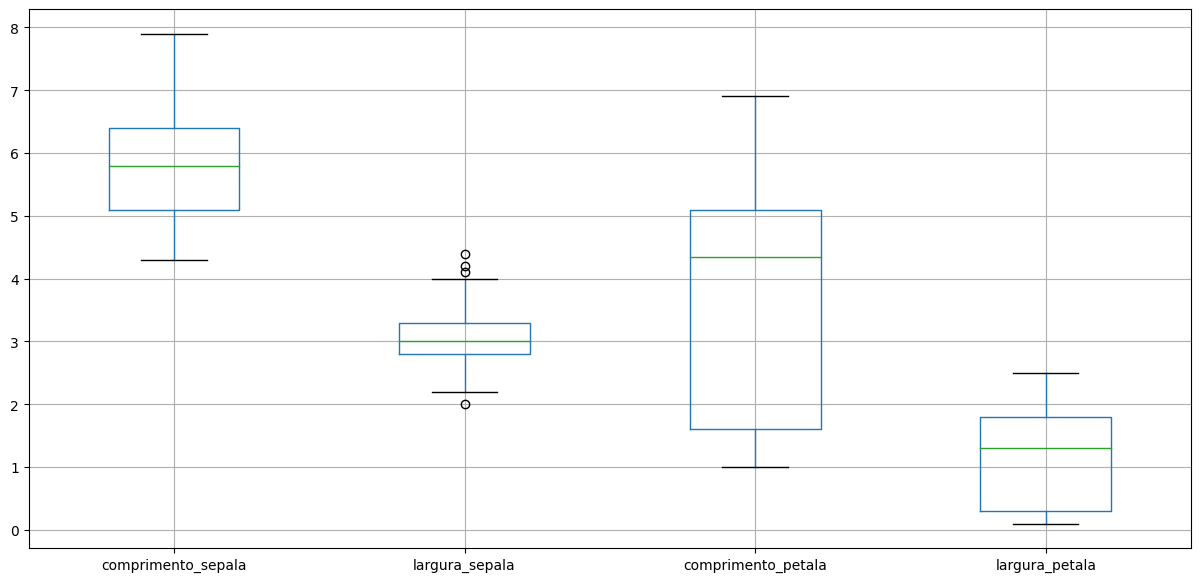

In [ ]:
df_dataset.boxplot(figsize=(15,7))
# mais informacoes sobre boxplot: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

## Seaborn

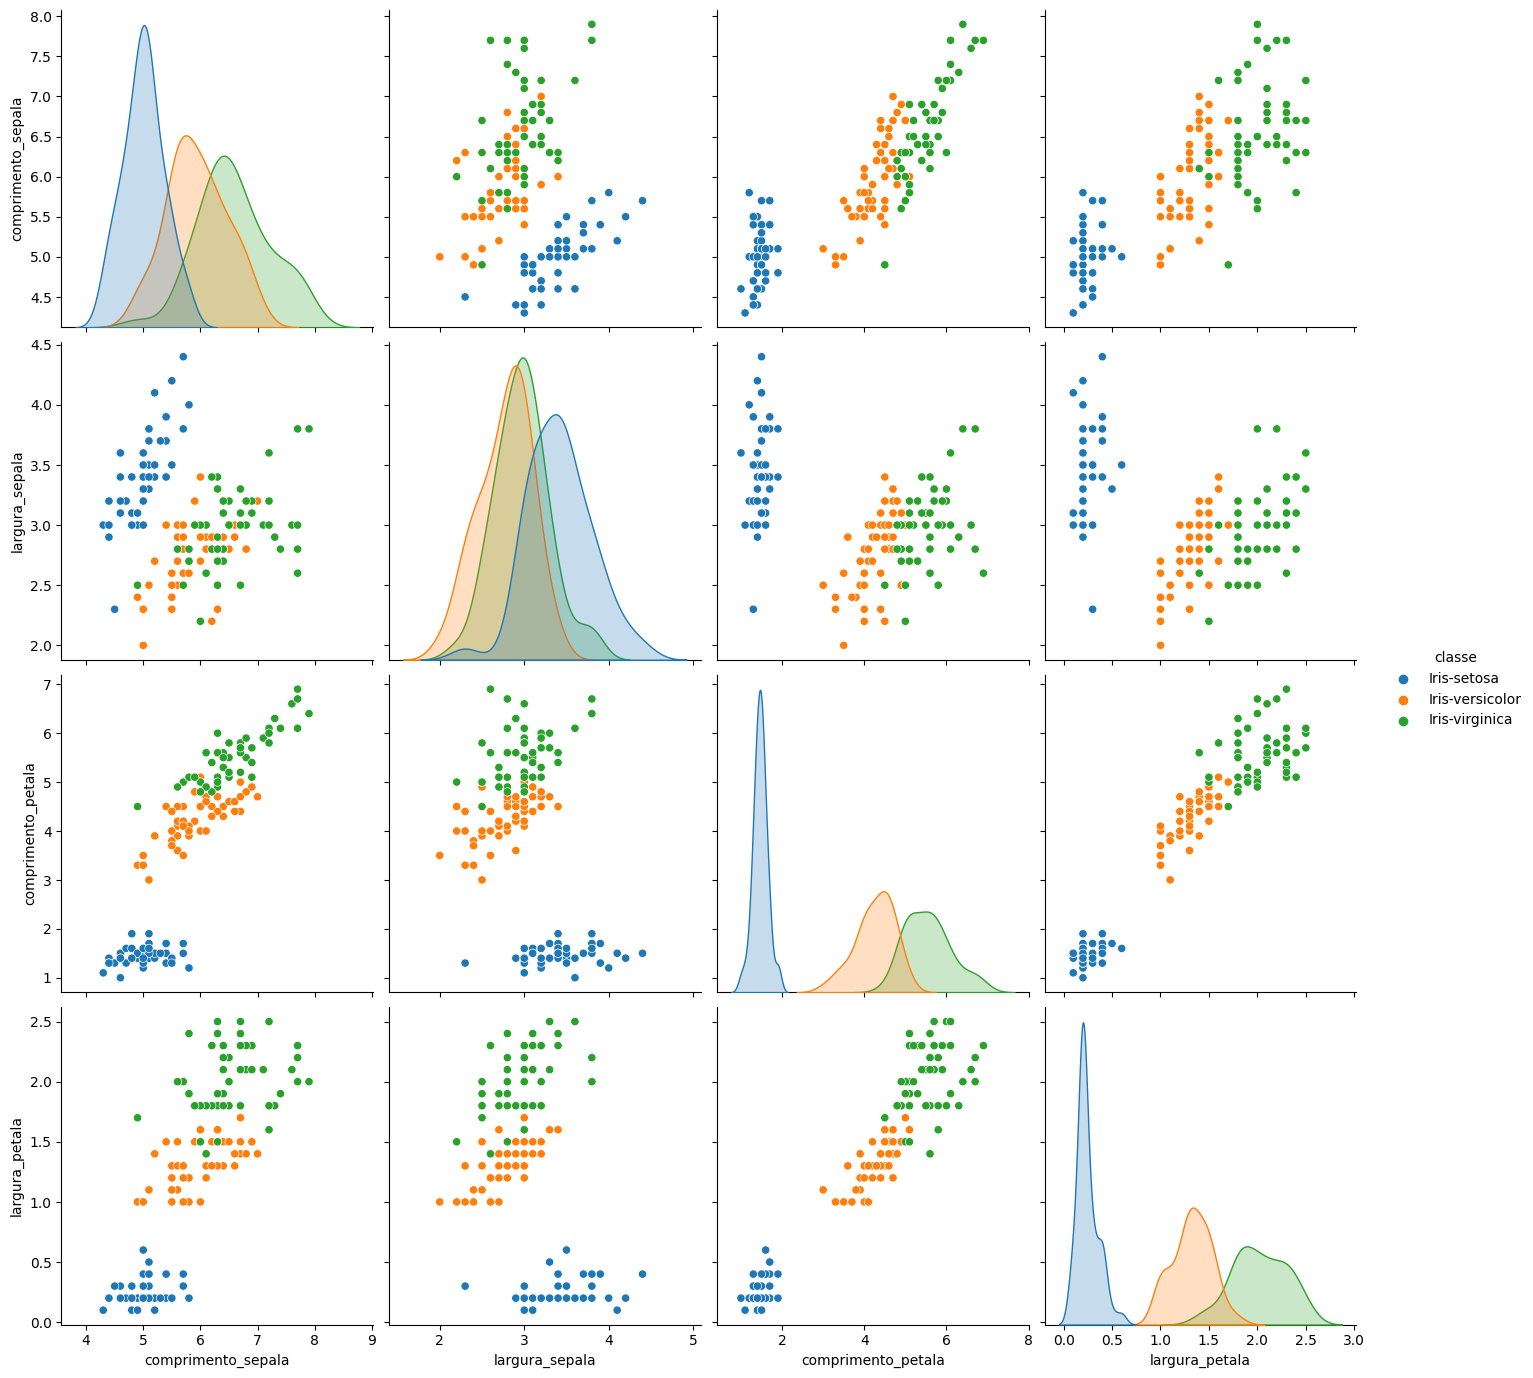

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de gráficos scatter
sns.pairplot(df_dataset, hue='classe', height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()

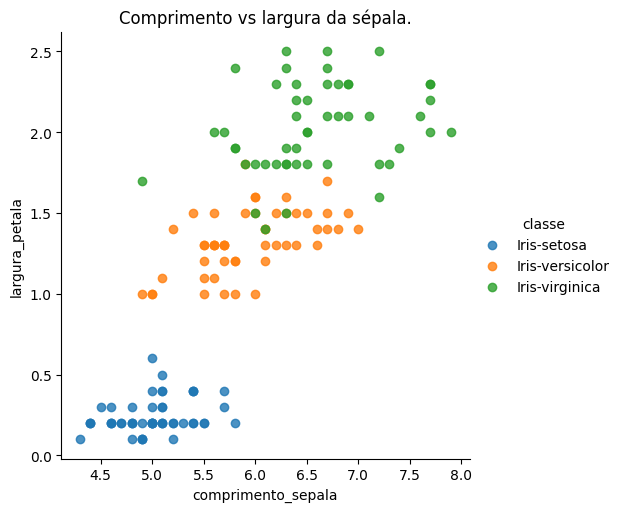

In [ ]:
#scatter plot
sns.lmplot(x='comprimento_sepala', y='largura_petala', data=df_dataset,
           fit_reg=False,
           hue='classe')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sépala.')

# mostra o gráfico
plt.show()

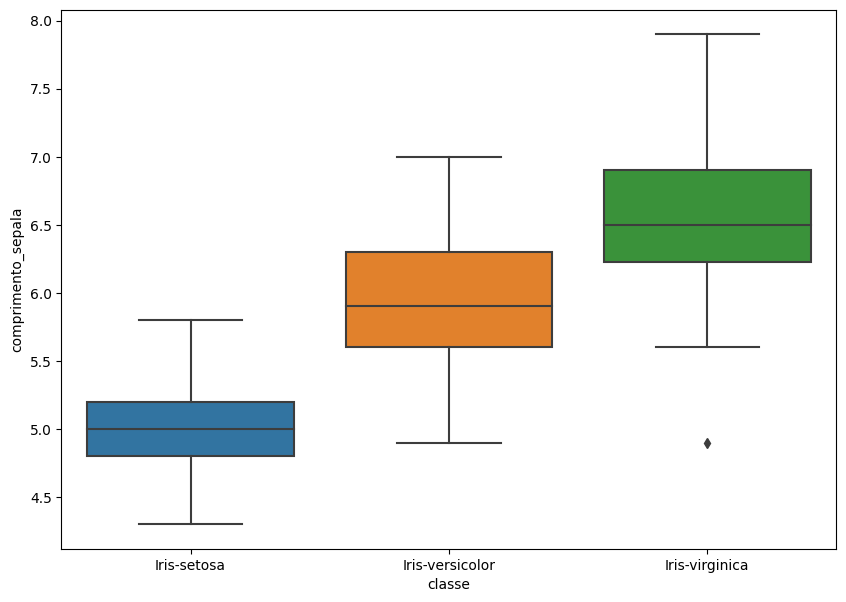

In [ ]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="classe", y="comprimento_sepala", data=df_dataset, whis=1.5)

#mostra o gráfico
plt.show()

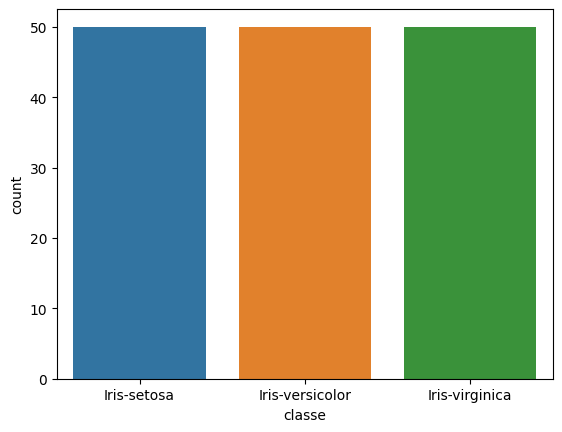

In [ ]:
# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

<ipython-input-14-8c84abf6c3e0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df_dataset.mean()
<ipython-input-14-8c84abf6c3e0>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df_dataset.std()


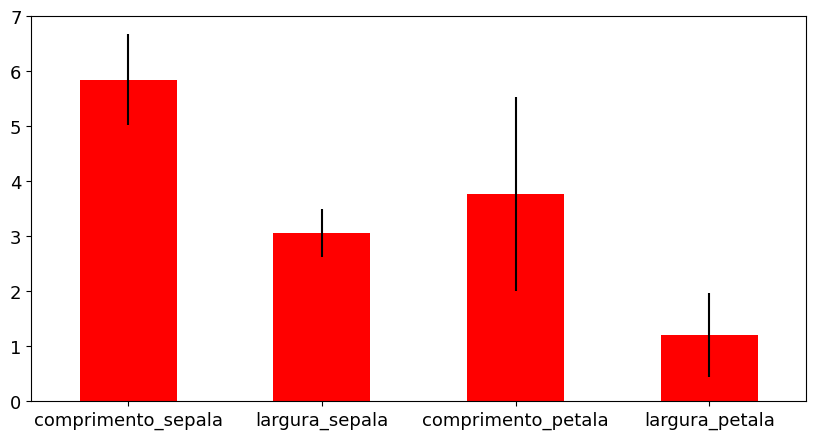

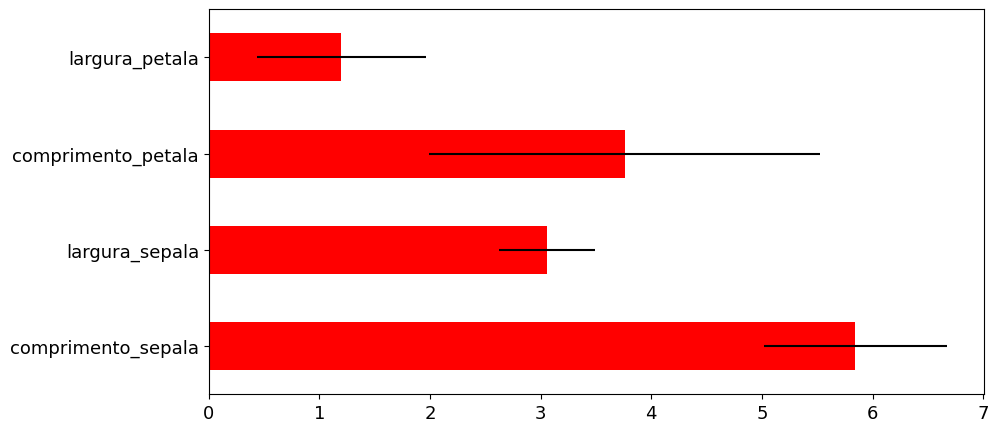

In [ ]:
mean = df_dataset.mean()

std = df_dataset.std()

# criando um gráfico de barras vertical
plt.figure(figsize=(10,5))
mean.plot(kind="bar", rot=0, color="red", fontsize=13, yerr=std);
plt.show()

# criando um gráfico de barras horizontal
plt.figure(figsize=(10,5))
mean.plot(kind="barh", rot=0, color="red", fontsize=13, xerr=std);
plt.show()

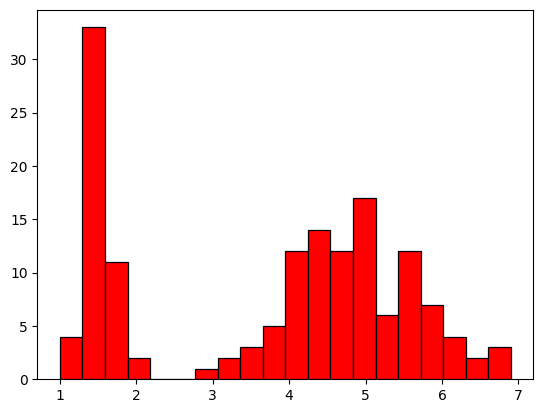

In [ ]:
# cria o histograma
n, bins, patches = plt.hist(df_dataset['comprimento_petala'].values, bins=20, color='red', edgecolor='black', linewidth=0.9)

#mostra o gráfico
plt.show()

## Correlação



Matriz de correlação: 


<ipython-input-16-5465c717fd85>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = df_dataset.corr()


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
comprimento_sepala,1.000000,-0.109369,0.871754,0.817954
largura_sepala,-0.109369,1.000000,-0.420516,-0.356544
comprimento_petala,0.871754,-0.420516,1.000000,0.962757
largura_petala,0.817954,-0.356544,0.962757,1.000000


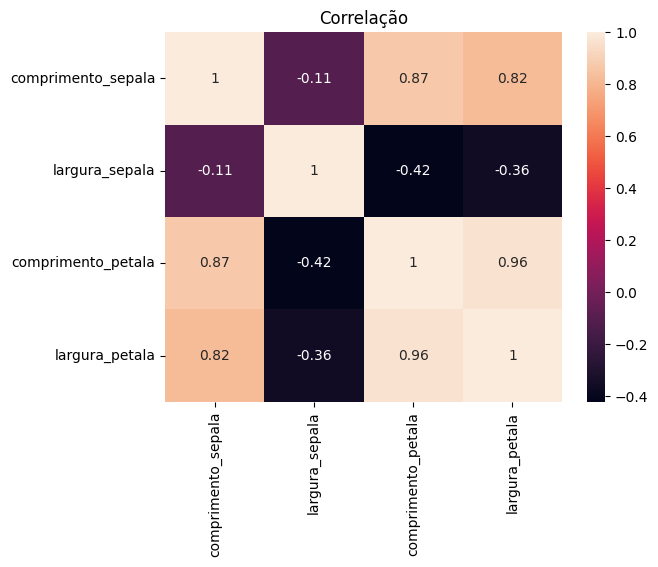

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values # exceto a coluna da classe (a última = -1)

# com pandas
# matriz de correlação
df_correlation = df_dataset.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

#quanto mais auto a relação eu tiro uma das colunas

### Exercício 1

Utilize as ferramentas aprendidas para gerar regras para classificar o conjunto de dados Titanic.

In [ ]:
import pandas as pd

titanic = pd.read_csv('titanic.data')

In [22]:
print(titanic.shape)
titanic.head(n=titanic.shape[1])

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [24]:
#Descricao dos meus dados
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# encontra as classes do conjunto
from collections import Counter

print('Classes e quantidade:', Counter(titanic['Survived']))

Classes e quantidade: Counter({0: 549, 1: 342})


<Axes: >

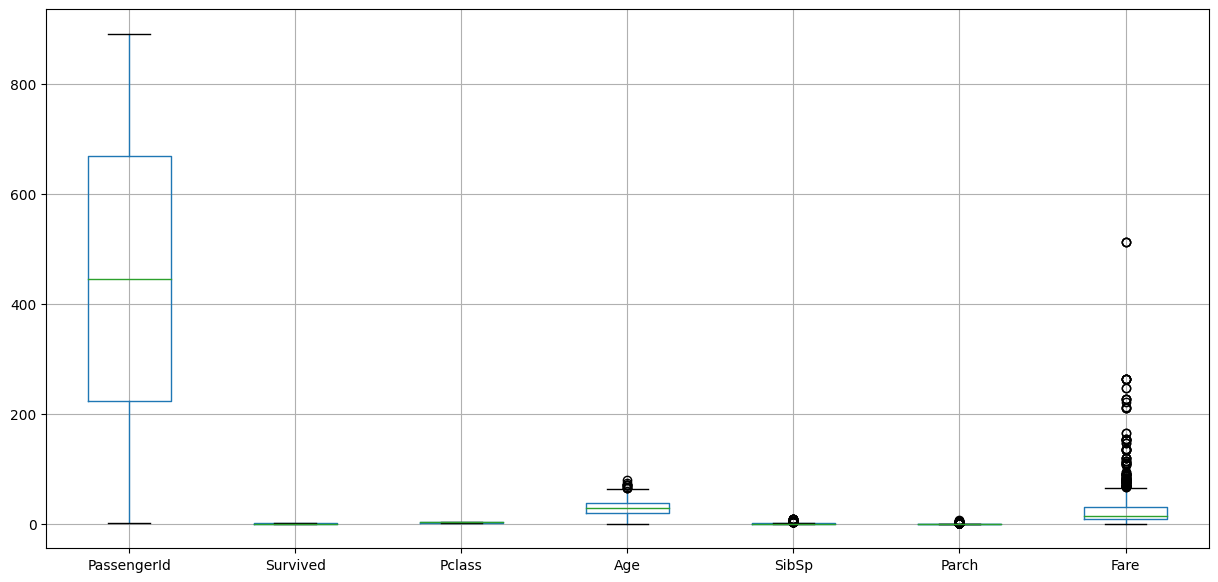

In [26]:
titanic.boxplot(figsize=(15,7))

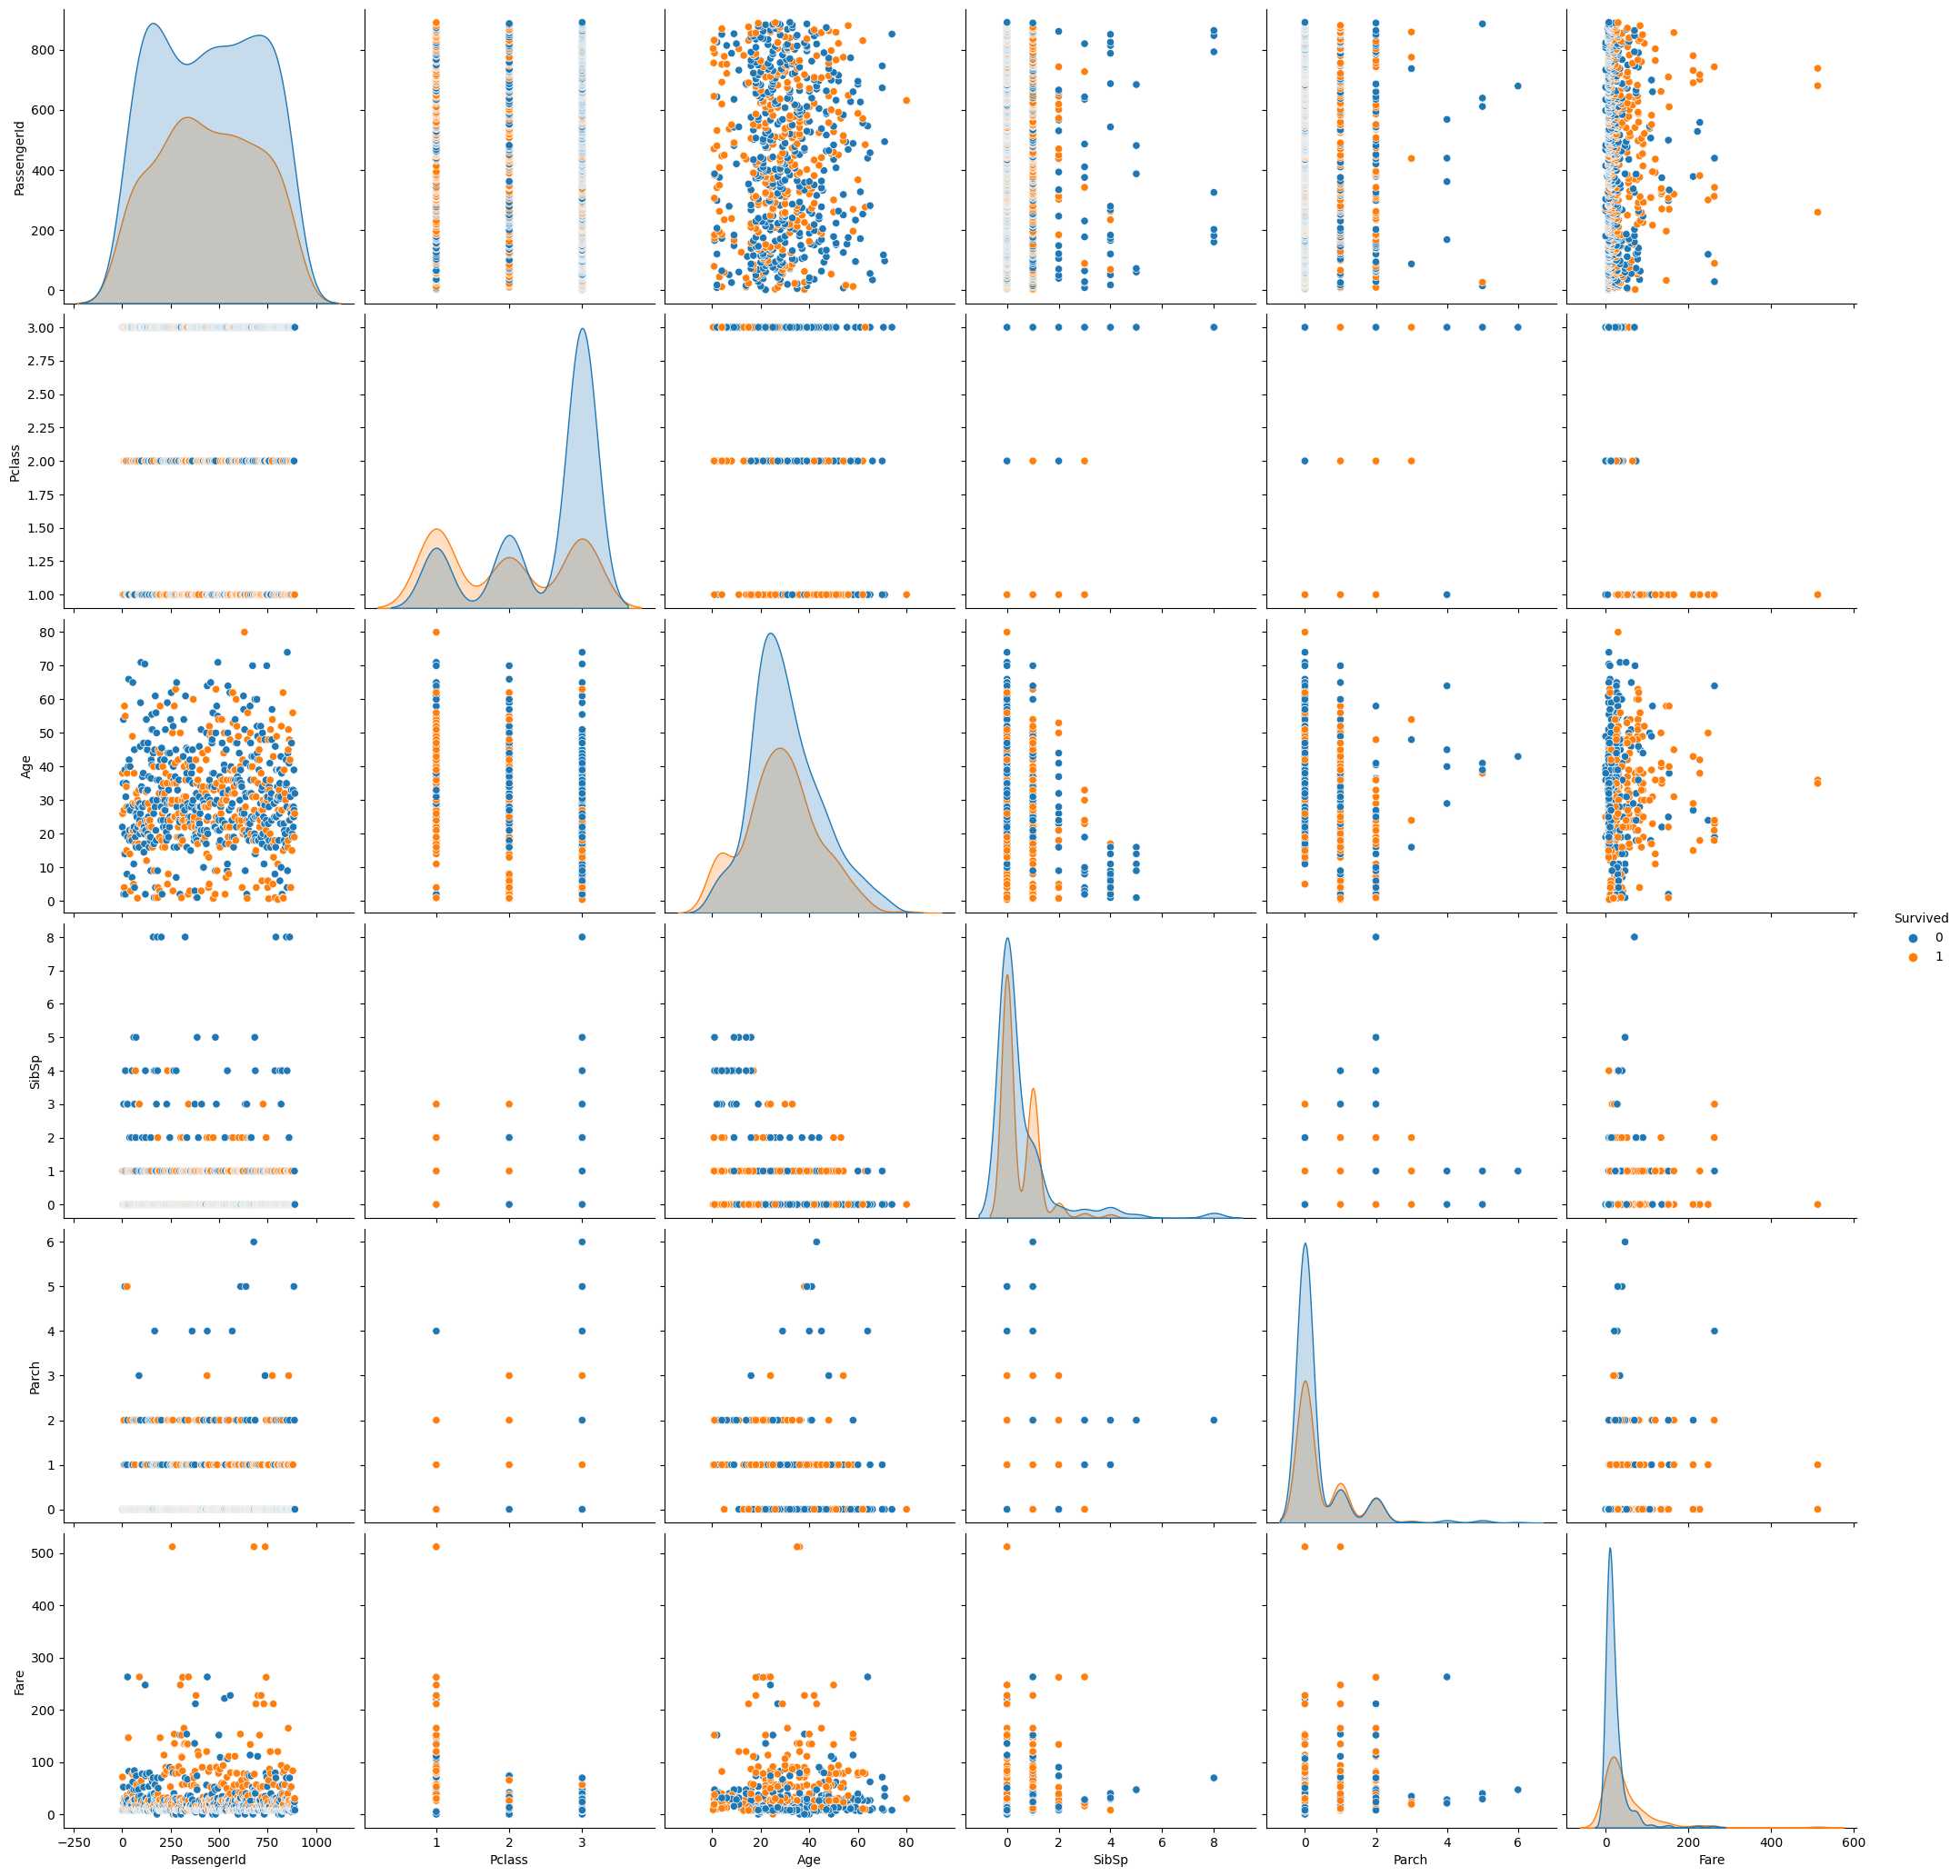

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# matriz de gráficos scatter
sns.pairplot(titanic, hue='Survived', height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()

In [53]:
#Limpeza dos dados inuteis
copia_titanic = titanic

copia_titanic = copia_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'SibSp'], axis = 1)

copia_titanic

 #preencher os dados faltando com média
copia_titanic.fillna({'Age':copia_titanic.Age.mean()},inplace=True) #Valor a ser usado para preencher buracos (por exemplo, 0)

copia_titanic['Sex'][copia_titanic['Sex']=='male'] =0 #mudando texto para numero
copia_titanic['Sex'][copia_titanic['Sex']=='female'] =1

<ipython-input-53-668ff4913c39>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_titanic['Sex'][copia_titanic['Sex']=='male'] =0 #mudando texto para numero
<ipython-input-53-668ff4913c39>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_titanic['Sex'][copia_titanic['Sex']=='female'] =1


<Axes: >

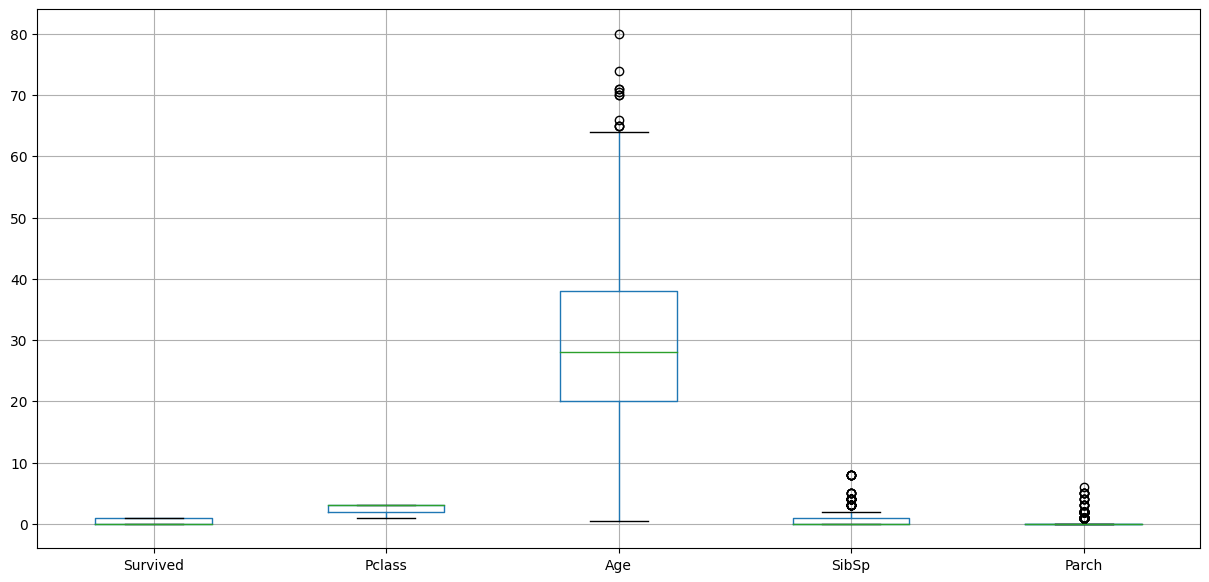

In [38]:
copia_titanic.boxplot(figsize=(15,7))

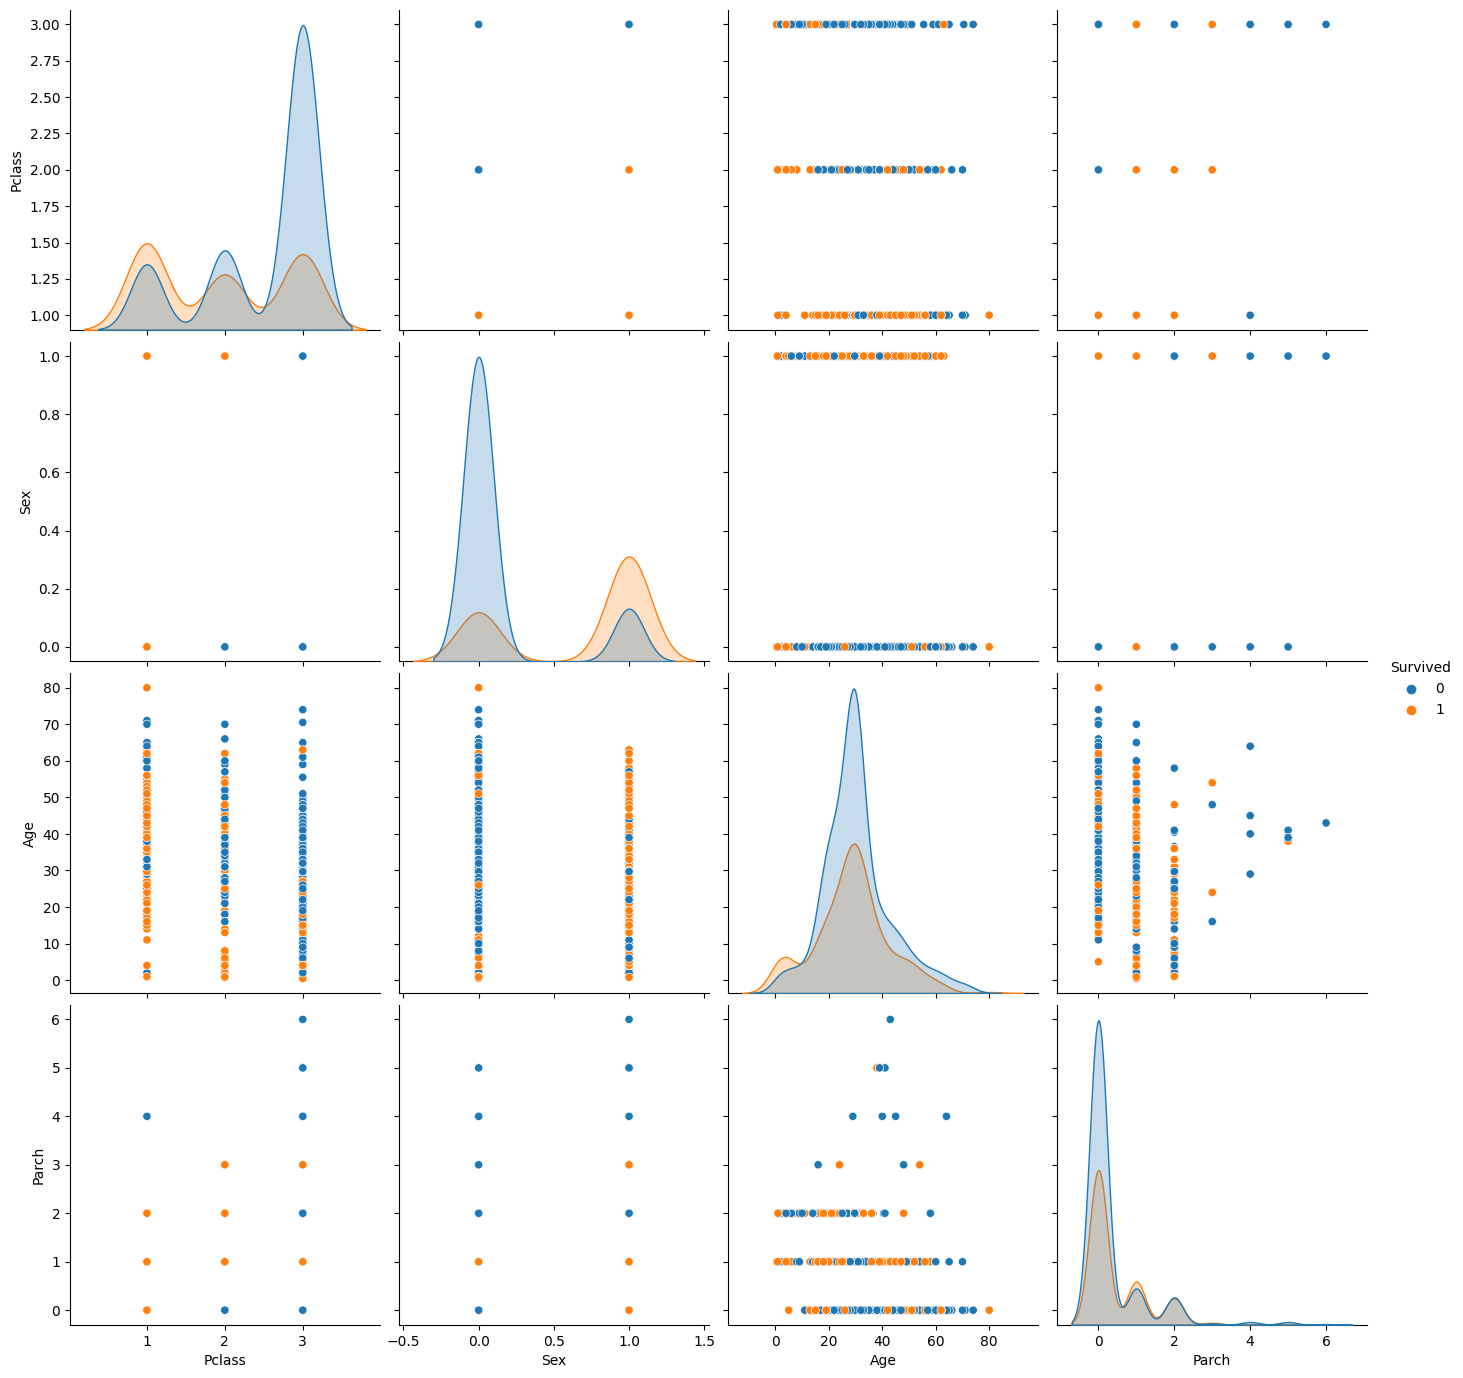

In [55]:


# matriz de gráficos scatter
sns.pairplot(copia_titanic, hue='Survived', height=3.5); # size -> height

# mostra o gráfico usando a função show() da matplotlib
plt.show()

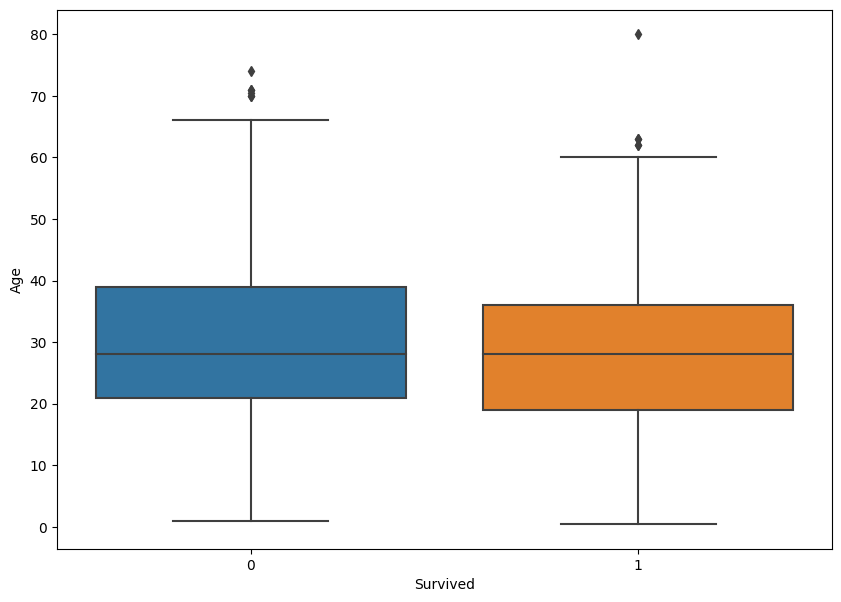

In [40]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="Survived", y="Age", data=copia_titanic, whis=1.5)

#mostra o gráfico
plt.show()

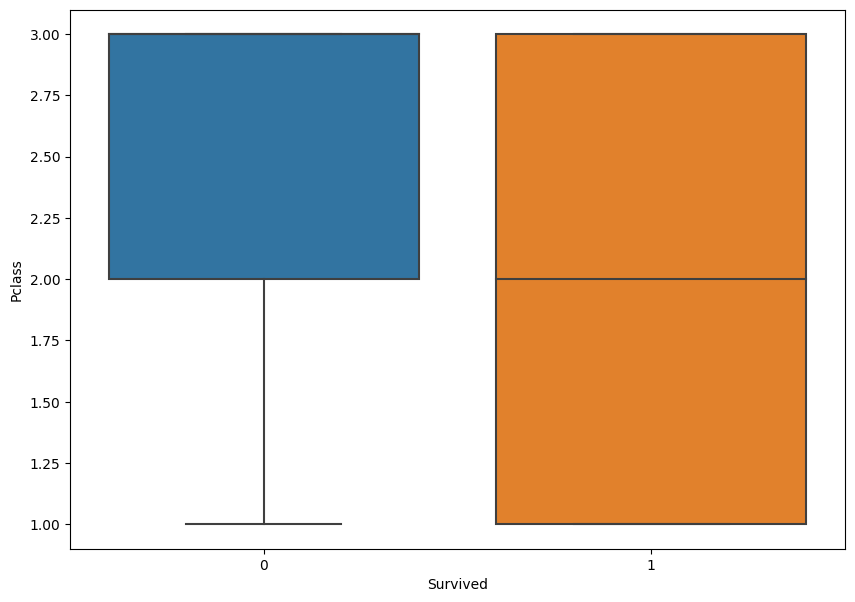

In [41]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="Survived", y="Pclass", data=copia_titanic, whis=1.5)

#mostra o gráfico
plt.show()

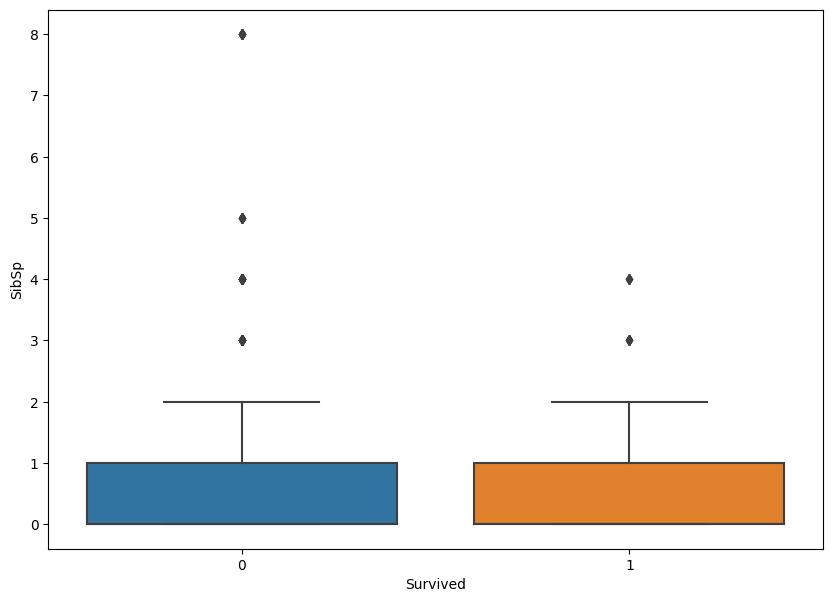

In [43]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="Survived", y="SibSp", data=copia_titanic, whis=1.5)

#mostra o gráfico
plt.show()



Matriz de correlação: 


<ipython-input-54-4279a670e293>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = copia_titanic.corr()


,Survived,Pclass,Age,Parch
Survived,1.000000,-0.338481,-0.069809,0.081629
Pclass,-0.338481,1.000000,-0.331339,0.018443
Age,-0.069809,-0.331339,1.000000,-0.179191
Parch,0.081629,0.018443,-0.179191,1.000000


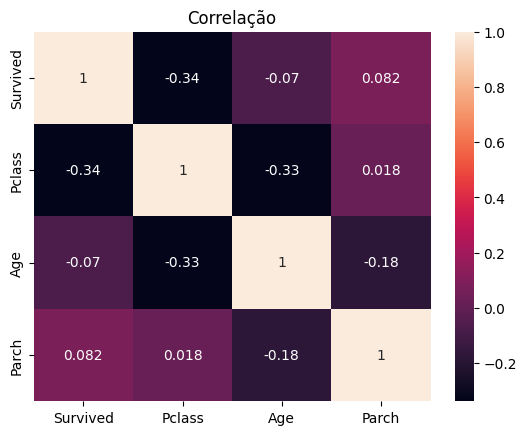

In [54]:

# com pandas
# matriz de correlação
df_correlation = copia_titanic.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

#quanto mais auto a relação eu tiro uma das colunas